 <h1 align="center" style="color:#050505"><strong>Climate Change Analysis</h1>

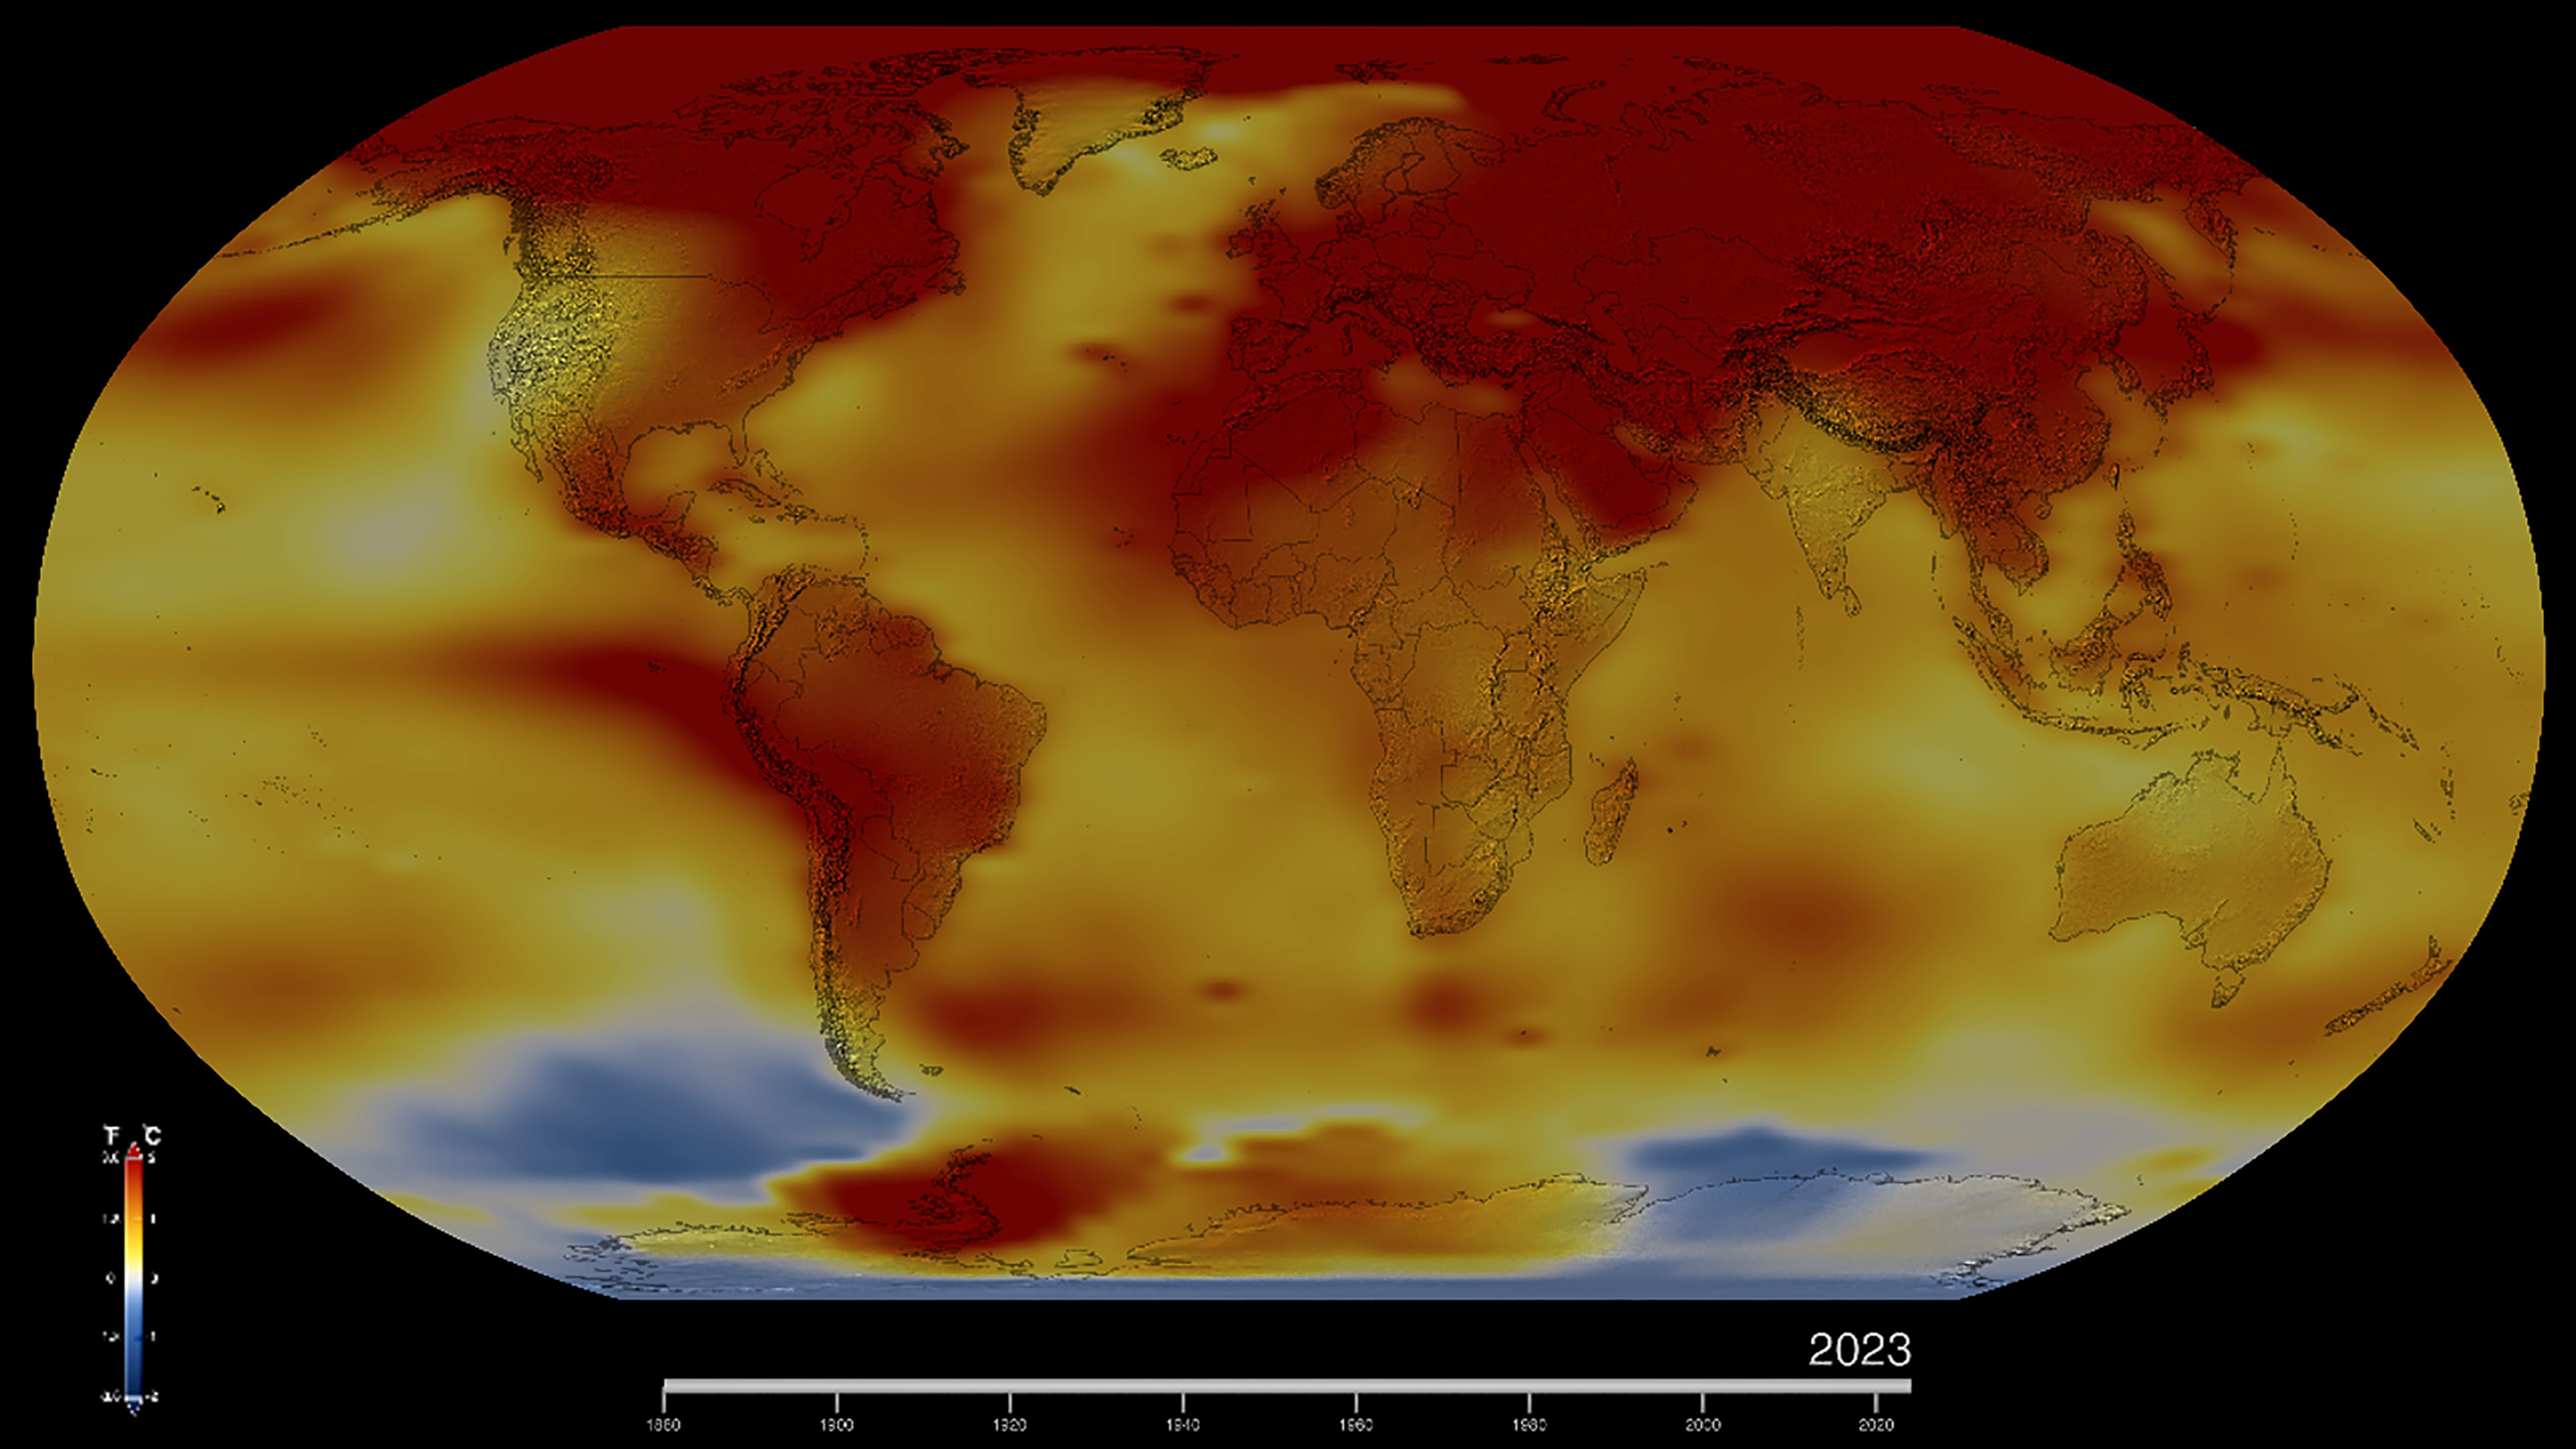

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math
import os
from sklearn.cluster import KMeans
import geopandas as gpd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 200)

In [4]:
dataset = pd.read_csv('/kaggle/input/climate-change-indicators/climate_change_indicators.csv')
df = pd.DataFrame(dataset)

### Cleaning the data

In [5]:
# subsetting
df = df[[ 
    'Country',  
    'ISO3', 
    'F1961', 'F1962',
    'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
    'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
    'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
    'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
    'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
    'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
    'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
    'F2019', 'F2020', 'F2021', 'F2022'
]].copy()

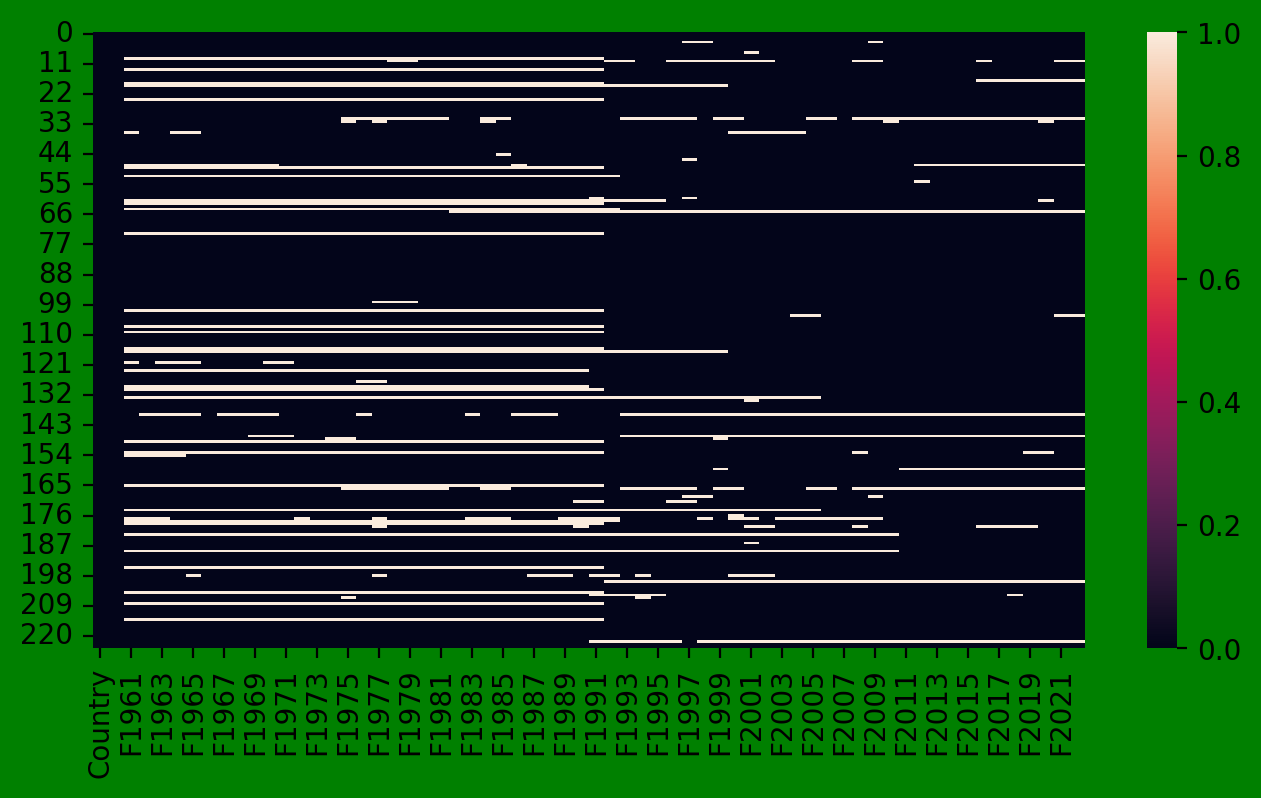

In [6]:
plt.figure(figsize = (8, 4), facecolor = "green")

sns.heatmap(
    df.isnull(), vmin = 0, vmax = 1
)

plt.show()

In [7]:
# checking for missing rows
df.isnull().sum()[[
    'F1990', 'F1991', 'F1992', 'F1993'
]]

F1990    36
F1991    37
F1992    17
F1993    16
dtype: int64

* There appears to be a notable disparity in the number of missing rows, particularly around the year **1992**.

In [8]:
df_dim = df[[
    'Country', 'ISO3',
    'F1992', 'F2002', 'F2012', 'F2022'
]]
df_dim.head()

,Country,ISO3,F1992,F2002,F2012,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012
1,Albania,ALB,0.106,0.492,1.487,1.518
2,Algeria,DZA,-0.312,1.258,1.147,1.688
3,American Samoa,ASM,0.344,1.152,0.924,1.256
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243


In [9]:
df_dim = df_dim.dropna().reset_index(drop = True).copy()

### Grouping

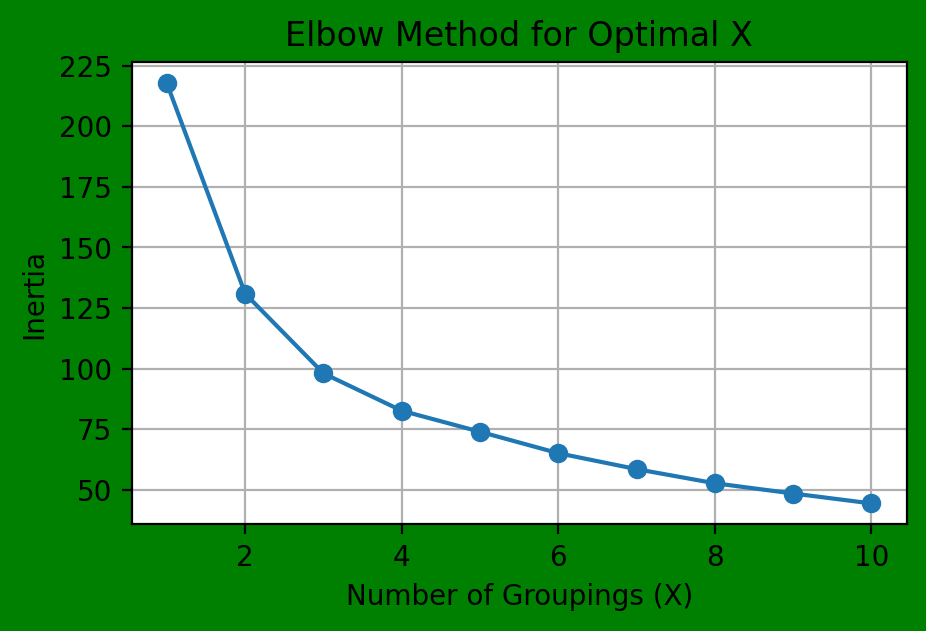

In [10]:
# choosing columns for grouping
I = df_dim.iloc[:, 2:]
list_inertia = []
X_range = range(1, 11)

#calculating inertia
for X in X_range:
    Xmeans = KMeans(n_clusters = X, n_init = 10, random_state = 84)
    Xmeans.fit(I)
    list_inertia.append(Xmeans.inertia_)
    
#plot
plt.figure(figsize = (5, 3), facecolor = "green")
plt.plot(X_range, list_inertia, marker = "o", linestyle = '-')
plt.xlabel('Number of Groupings (X)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal X')
plt.grid(True)
plt.show()

In [11]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 84)
df_dim['Cluster'] = kmeans.fit_predict(I)

#showings the clustered area
display(df_dim)

,Country,ISO3,F1992,F2002,F2012,F2022,Cluster
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012,0
1,Albania,ALB,0.106,0.492,1.487,1.518,1
2,Algeria,DZA,-0.312,1.258,1.147,1.688,0
3,American Samoa,ASM,0.344,1.152,0.924,1.256,1
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243,2
...,...,...,...,...,...,...,...
192,West Bank and Gaza,PSE,-1.045,0.728,1.043,1.074,0
193,Western Sahara,ESH,0.529,1.249,1.344,1.970,2
194,World,WLD,0.184,1.021,1.074,1.394,1
195,Zambia,ZMB,0.544,0.711,0.972,0.686,1


### Exploration

In [12]:
#descriptive stats
df_dim['Cluster'].value_counts()

Cluster
1    125
2     48
0     24
Name: count, dtype: int64

In [13]:
# table displaying statistics of clusters
df_table_stats = df_dim.groupby('Cluster').agg({
    'F1992': ['std', 'mean', 'min', 'max'],
    'F2002': ['std', 'mean', 'min', 'max'],
    'F2012': ['std', 'mean', 'min', 'max'],
    'F2022': ['std', 'mean', 'min', 'max'],
}).round(3)
display(df_table_stats.T)

Cluster         0      1      2
F1992 std   0.384  0.350  0.457
      mean -0.798  0.262  0.705
      min  -1.344 -0.716 -0.059
      max   0.100  1.147  1.601
F2002 std   0.404  0.224  0.352
      mean  1.039  0.740  1.332
      min   0.009  0.017  0.681
      max   1.716  1.380  2.255
F2012 std   0.459  0.251  0.428
      mean  1.178  0.672  1.314
      min  -0.032 -0.128  0.230
      max   2.144  1.487  2.089
F2022 std   0.415  0.427  0.356
      mean  1.636  0.991  2.218
      min   1.040 -1.305  1.405
      max   2.370  1.840  3.243

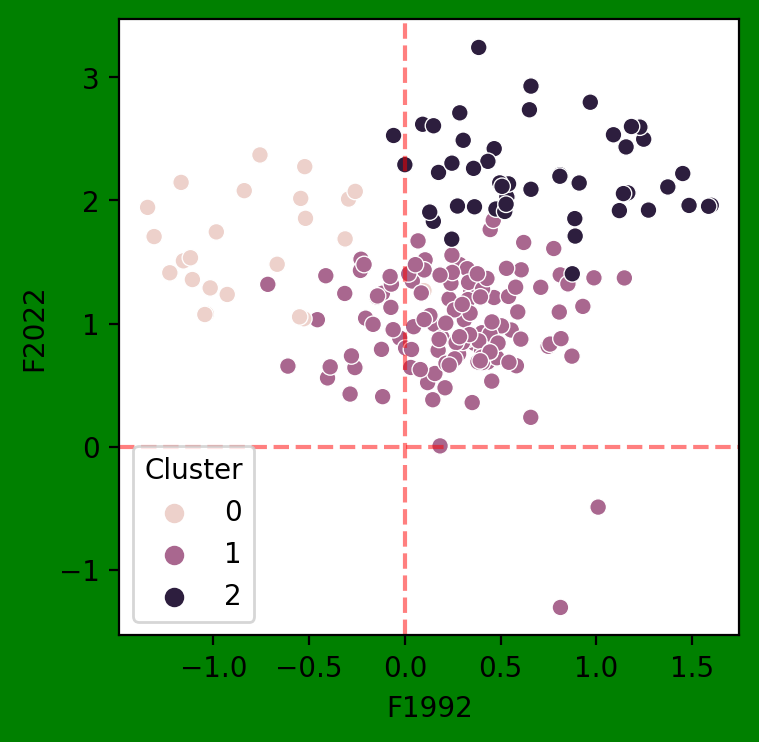

In [14]:
plt.figure(figsize = (4, 4), facecolor = "green")
sns.scatterplot(
    data = df_dim,
    x = 'F1992', y = 'F2022',
    hue = 'Cluster'
)
plt.axhline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.axvline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.show()

### Visualization

In [15]:
df_globe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_globe['ISO3'] = df_globe['iso_a3']

df_globe = pd.merge(df_globe, df_dim, on = ['ISO3'], how = 'left')
df_globe.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ISO3,Country,F1992,F2002,F2012,F2022,Cluster
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,"Fiji, Rep. of",0.039,0.720,0.589,1.346,1.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,"Tanzania, United Rep. of",0.338,0.646,0.820,0.911,1.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,Western Sahara,0.529,1.249,1.344,1.970,2.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada,0.100,0.540,2.144,1.268,0.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States,0.395,0.951,1.448,1.217,1.0


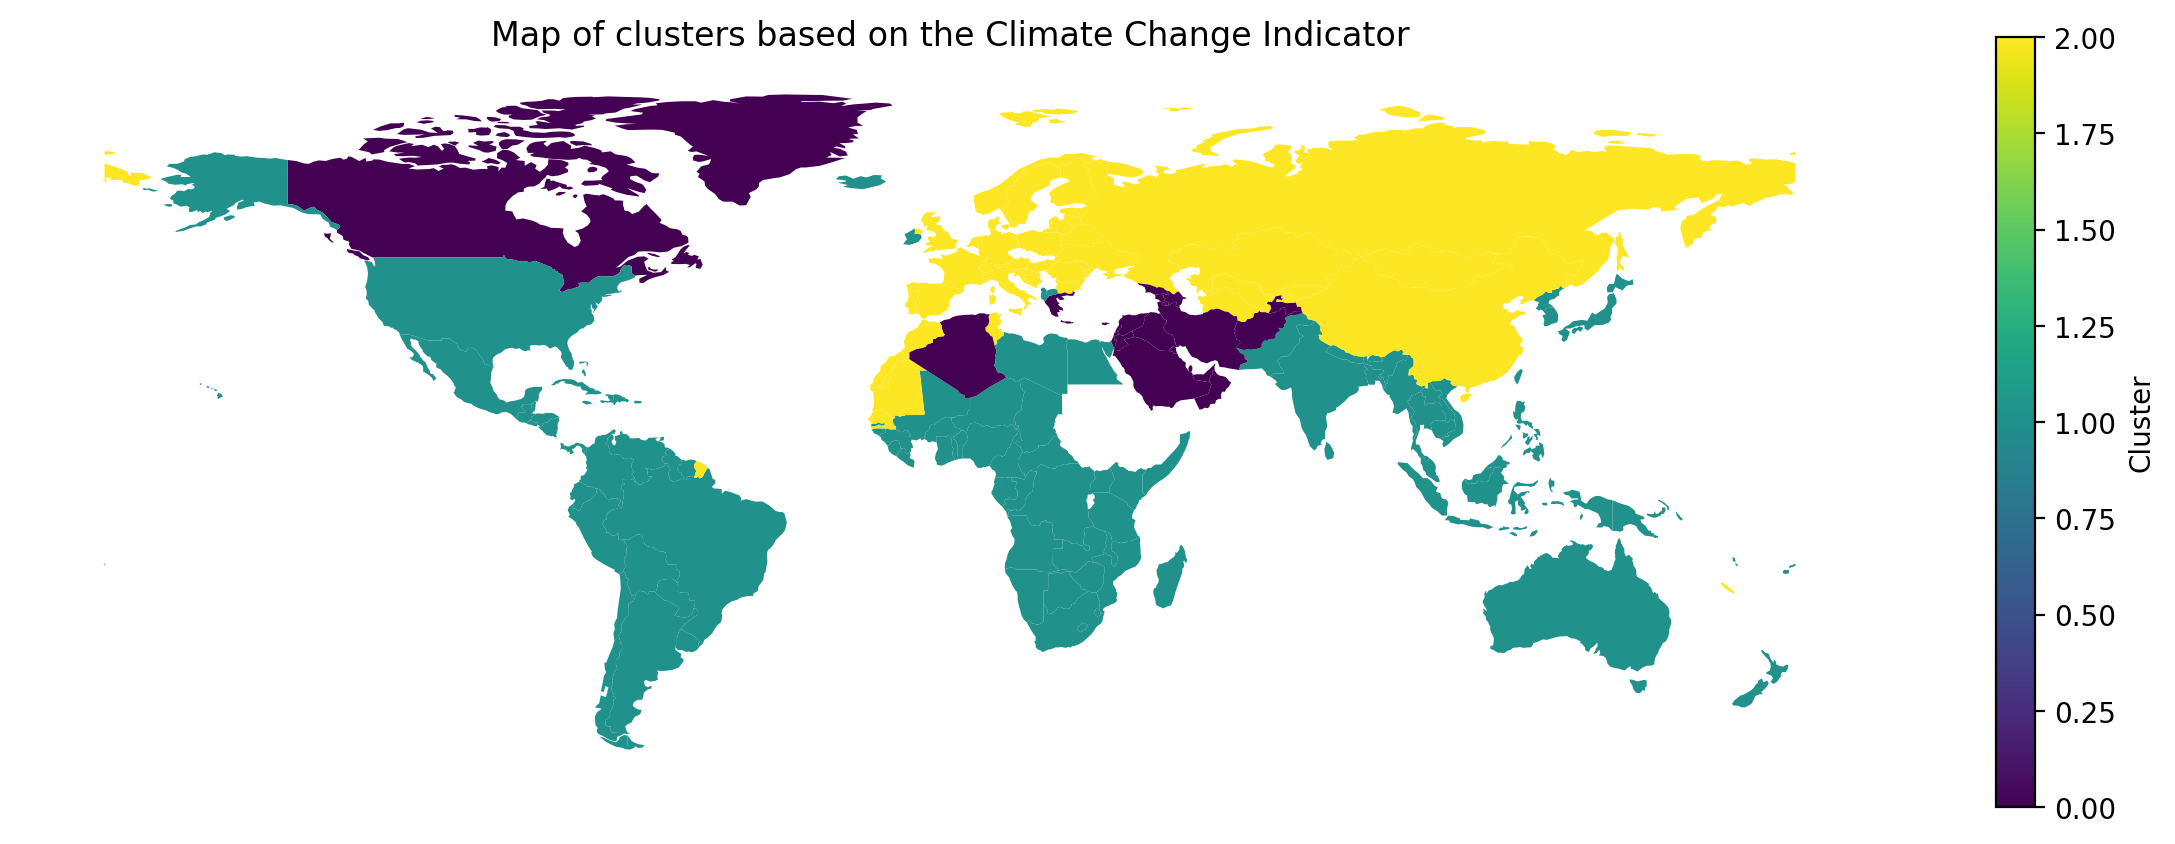

In [16]:
fig, ax = plt.subplots(figsize = (15, 5), facecolor = "white")
df_globe.plot(
    column = df_globe['Cluster'], ax = ax,
    legend = True,
    legend_kwds = {
        'label': "Cluster"
    }
)
ax.set_axis_off()
ax.set_title("Map of clusters based on the Climate Change Indicator")
plt.show()

In [17]:
print(list(df_dim.query("Cluster == 0")['Country']))

['Afghanistan, Islamic Rep. of', 'Algeria', 'Armenia, Rep. of', 'Azerbaijan, Rep. of', 'Bahrain, Kingdom of', 'Canada', 'Cyprus', 'Georgia', 'Greece', 'Greenland', 'Iran, Islamic Rep. of', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saint Pierre and Miquelon', 'Saudi Arabia', 'Syrian Arab Rep.', 'Tajikistan, Rep. of', 'United Arab Emirates', 'West Bank and Gaza']


### Cluster 0
* In 1992, countries primarily in Central Asia and the Arab region experienced a decrease, whereas in 2022, they showed moderate increases.

In [18]:
print(list(df_dim.query("Cluster == 2")['Country']))

['Andorra, Principality of', 'Austria', 'Belarus, Rep. of', 'Bosnia and Herzegovina', 'Bulgaria', 'Cabo Verde', 'China, P.R.: Mainland', 'Croatia, Rep. of', 'Denmark', 'Estonia, Rep. of', 'Finland', 'France', 'Germany', 'Gibraltar', 'Holy See', 'Hungary', 'Italy', 'Kazakhstan, Rep. of', 'Kyrgyz Rep.', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malta', 'Mauritania, Islamic Rep. of', 'Moldova, Rep. of', 'Monaco', 'Mongolia', 'Morocco', 'Netherlands, The', 'New Caledonia', 'Norway', 'Poland, Rep. of', 'Portugal', 'Romania', 'Russian Federation', 'Saint Helena', 'San Marino, Rep. of', 'Senegal', 'Slovenia, Rep. of', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'Uzbekistan, Rep. of', 'Western Sahara']


### Cluster 2
* In 1992, countries primarily in Europe exhibited an increase, and in 2022, they experienced substantial rises.